# SIR модель #
Работа выполнена студентом группы 23КНТ2 ИМИКН ВШЭ НН ***Власовым Артёмом Дмитриевичем***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Великобритания.xlsx', sheet_name='Sheet1')
df.head()

,Страна,Дата,Заражений,Выздоровлений,Смертей,Заражений за день,Выздоровлений за день,Смертей за день,Население страны,Тестов,Тестов за день
0,Великобритания,20.07.2020,296940,1413.0,41090,586,0.0,10,63181775,8256935,121693
1,Великобритания,21.07.2020,297385,1414.0,41115,445,1.0,25,63181775,8388397,131462
2,Великобритания,22.07.2020,297948,1416.0,41132,563,2.0,17,63181775,8522679,134282
3,Великобритания,23.07.2020,298727,1425.0,41141,779,9.0,9,63181775,8663993,141314
4,Великобритания,24.07.2020,299495,1425.0,41173,768,0.0,32,63181775,8798036,134043


Удаляем столбец **'Страна'**, поскольку он не несёт никакой полезной информации

In [3]:
df.drop(columns=['Страна'], inplace=True)
df.head()

,Дата,Заражений,Выздоровлений,Смертей,Заражений за день,Выздоровлений за день,Смертей за день,Население страны,Тестов,Тестов за день
0,20.07.2020,296940,1413.0,41090,586,0.0,10,63181775,8256935,121693
1,21.07.2020,297385,1414.0,41115,445,1.0,25,63181775,8388397,131462
2,22.07.2020,297948,1416.0,41132,563,2.0,17,63181775,8522679,134282
3,23.07.2020,298727,1425.0,41141,779,9.0,9,63181775,8663993,141314
4,24.07.2020,299495,1425.0,41173,768,0.0,32,63181775,8798036,134043


### 1. Вычислить количество инфицированных I на каждый день наблюдений

In [4]:
df['Инфицированные'] = df['Заражений'] - df['Выздоровлений'] - df['Смертей']
df.head()

,Дата,Заражений,Выздоровлений,Смертей,Заражений за день,Выздоровлений за день,Смертей за день,Население страны,Тестов,Тестов за день,Инфицированные
0,20.07.2020,296940,1413.0,41090,586,0.0,10,63181775,8256935,121693,254437.0
1,21.07.2020,297385,1414.0,41115,445,1.0,25,63181775,8388397,131462,254856.0
2,22.07.2020,297948,1416.0,41132,563,2.0,17,63181775,8522679,134282,255400.0
3,23.07.2020,298727,1425.0,41141,779,9.0,9,63181775,8663993,141314,256161.0
4,24.07.2020,299495,1425.0,41173,768,0.0,32,63181775,8798036,134043,256897.0


### 2. Выполнить нормировку данных на 100 тыс. населения

In [6]:
pop = df['Население страны'].iloc[0]  # Берем первое значение населения
df['Инфицированные на 100 тыс.'] = df['Инфицированные'] * 100000 / pop
df['Заражений на 100 тыс.'] = df['Заражений'] * 100000 / pop

In [10]:
df.head()

,Дата,Заражений,Выздоровлений,Смертей,Заражений за день,Выздоровлений за день,Смертей за день,Население страны,Тестов,Тестов за день,Инфицированные,Инфицированные на 100 тыс.,Заражений на 100 тыс.
0,20.07.2020,296940,1413.0,41090,586,0.0,10,63181775,8256935,121693,254437.0,402.706318,469.977300
1,21.07.2020,297385,1414.0,41115,445,1.0,25,63181775,8388397,131462,254856.0,403.369484,470.681617
2,22.07.2020,297948,1416.0,41132,563,2.0,17,63181775,8522679,134282,255400.0,404.230492,471.572696
3,23.07.2020,298727,1425.0,41141,779,9.0,9,63181775,8663993,141314,256161.0,405.434953,472.805647
4,24.07.2020,299495,1425.0,41173,768,0.0,32,63181775,8798036,134043,256897.0,406.599846,474.021187


### 3.На основе данных построить оценку параметра γ – интенсивности выздоровления

In [11]:
df['dR/dt'] = df['Выздоровлений за день'] / df['Инфицированные']
gamma = df['dR/dt'].mean()
print("γ: ", gamma)

γ:  2.53430767883143e-05


In [17]:
df.head()

,Дата,Заражений,Выздоровлений,Смертей,Заражений за день,Выздоровлений за день,Смертей за день,Население страны,Тестов,Тестов за день,Инфицированные,Инфицированные на 100 тыс.,Заражений на 100 тыс.,dR/dt
0,20.07.2020,296940,1413.0,41090,586,0.0,10,63181775,8256935,121693,254437.0,402.706318,469.977300,0.000000
1,21.07.2020,297385,1414.0,41115,445,1.0,25,63181775,8388397,131462,254856.0,403.369484,470.681617,0.000004
2,22.07.2020,297948,1416.0,41132,563,2.0,17,63181775,8522679,134282,255400.0,404.230492,471.572696,0.000008
3,23.07.2020,298727,1425.0,41141,779,9.0,9,63181775,8663993,141314,256161.0,405.434953,472.805647,0.000035
4,24.07.2020,299495,1425.0,41173,768,0.0,32,63181775,8798036,134043,256897.0,406.599846,474.021187,0.000000


### 4. С помощью метода наименьших квадратов построить оценку параметра SIR-модели β (интенсивность заражения) в предположении, что изначально все население является восприимчивым к заболеванию.

In [12]:
def sir_model(t, beta):
    S = pop - df['Заражений'].iloc[0]  # Начальное количество восприимчивых
    I = df['Заражений'].iloc[0]  # Начальное количество инфицированных
    R = 0  # Начальное число выздоровевших

    dt = 1  # Временной шаг
    I_vals = []

    for _ in range(len(df)):
        new_infected = beta * S * I / pop
        new_recovered = gamma * I

        S -= new_infected * dt
        I += (new_infected - new_recovered) * dt
        R += new_recovered * dt

        I_vals.append(I)

    return np.array(I_vals)

In [19]:
df = df.fillna(0) # заменит все NaN на 0
df.tail(10)

,Дата,Заражений,Выздоровлений,Смертей,Заражений за день,Выздоровлений за день,Смертей за день,Население страны,Тестов,Тестов за день,Инфицированные,Инфицированные на 100 тыс.,Заражений на 100 тыс.,dR/dt
599,11.03.2022,19673347,0.0,163317,73054,0.0,114,63181775,472676188,537809,0.0,0.0,31137.692792,0.0
600,12.03.2022,19673347,0.0,163317,0,0.0,0,63181775,473241668,565480,0.0,0.0,31137.692792,0.0
601,13.03.2022,19673347,0.0,163317,0,0.0,0,63181775,474114335,872667,0.0,0.0,31137.692792,0.0
602,14.03.2022,19845016,0.0,163454,171669,0.0,137,63181775,474937566,823231,0.0,0.0,31409.399309,0.0
603,15.03.2022,19965698,0.0,163680,120682,0.0,226,63181775,475778344,840778,0.0,0.0,31600.406921,0.0
604,16.03.2022,20059641,0.0,163833,93943,0.0,153,63181775,476632060,853716,0.0,0.0,31749.093785,0.0
605,17.03.2022,20150847,0.0,163972,91206,0.0,139,63181775,477378853,746793,0.0,0.0,31893.448704,0.0
606,18.03.2022,20243940,0.0,164099,93093,0.0,127,63181775,477950504,571651,0.0,0.0,32040.790244,0.0
607,19.03.2022,20243940,0.0,164099,0,0.0,0,63181775,478578610,628106,0.0,0.0,32040.790244,0.0
608,20.03.2022,20243940,0.0,164099,0,0.0,0,63181775,0,0,0.0,0.0,32040.790244,0.0


In [20]:
from scipy.optimize import curve_fit

t_values = np.arange(len(df))
beta_opt, _ = curve_fit(sir_model, t_values, df['Инфицированные'])

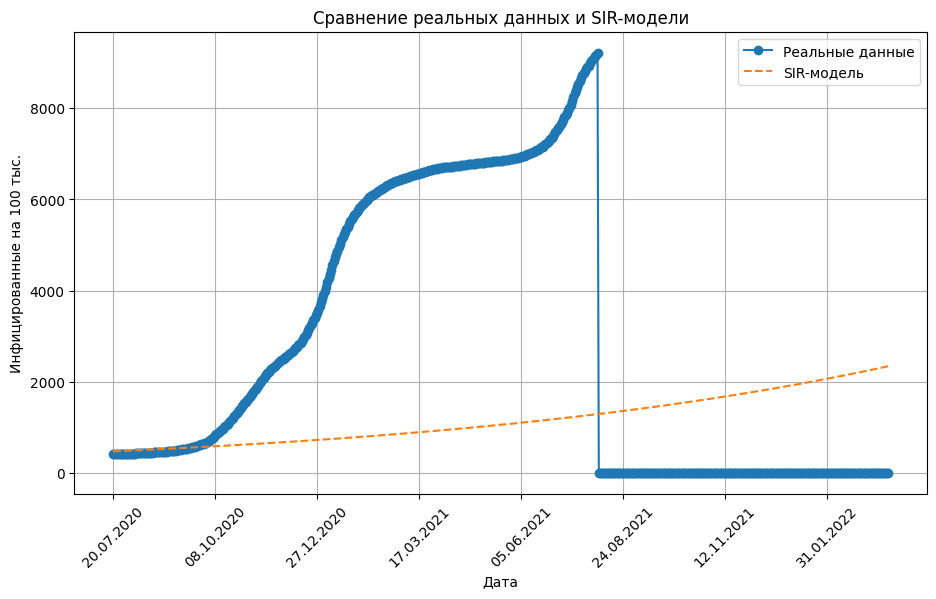

In [26]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(11, 6))
plt.plot(df['Дата'], df['Инфицированные на 100 тыс.'], label='Реальные данные', marker='o')
plt.plot(df['Дата'], sir_model(t_values, beta_opt[0]) * 100000 / pop, label='SIR-модель', linestyle='--')

plt.xlabel('Дата')
plt.ylabel('Инфицированные на 100 тыс.')
plt.title('Сравнение реальных данных и SIR-модели')
plt.legend()

# Настройка оси X: убираем избыточные подписи
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))  # Ограничиваем количество подписей на X

plt.grid()
plt.show()
